# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
# SEE THE chipo_.csv in the datasets folder
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [6]:
temp = pd.DataFrame(chipo.groupby("item_name")["quantity"].sum())
temp = temp.sort_values(by = "quantity")
temp = temp[-5:]
temp

,quantity
item_name,
Canned Soft Drink,351
Steak Burrito,386
Chips and Guacamole,506
Chicken Burrito,591
Chicken Bowl,761


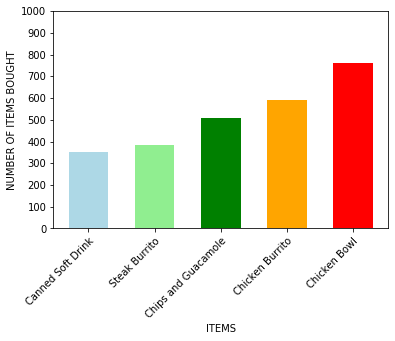

In [7]:
plt.bar(temp.index,temp.quantity,width = 0.6,color = ["lightblue","lightgreen","green","orange","red"])
plt.xticks(rotation = 45,rotation_mode = "anchor",ha = "right")
y_axis = np.arange(0,1100,100)
plt.yticks(y_axis)
plt.xlabel("ITEMS")
plt.ylabel("NUMBER OF ITEMS BOUGHT");

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [8]:
temp = chipo.groupby("order_id")[["quantity","item_price"]].sum()


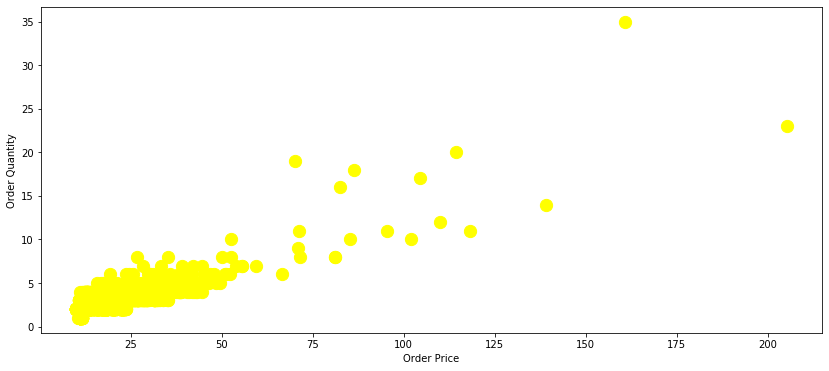

In [9]:
plt.figure(figsize = (14,6))
plt.scatter(temp.item_price,temp.quantity,s = 150,color = "yellow")
plt.xlabel("Order Price")
plt.ylabel("Order Quantity");


### Step 7. BONUS: Create a question and a graph to answer your own question.

## Top 10 costliest items

In [10]:
temp = pd.DataFrame(chipo.groupby("item_name")["item_price"].mean())
temp = temp.sort_values(by = "item_price")
temp = temp[-10:]
temp

,item_price
item_name,
Veggie Soft Tacos,10.565714
Barbacoa Salad Bowl,10.640000
Steak Bowl,10.711801
Carnitas Bowl,10.833971
Barbacoa Crispy Tacos,10.928182
Carnitas Salad Bowl,11.056667
Carnitas Crispy Tacos,11.137143
Chicken Salad Bowl,11.170455
Steak Salad Bowl,11.847931


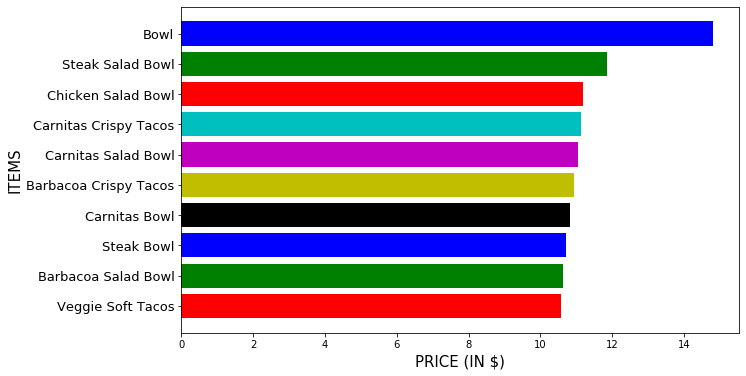

In [45]:
plt.figure(figsize = (10,6))
plt.barh(temp.index,temp.item_price,color = list('rgbkymc'))
plt.yticks(fontsize = 13)
plt.ylabel("ITEMS",fontsize = 15)
plt.xlabel("PRICE (IN $)",fontsize = 15);